In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
Bike_data = pd.read_csv('C:/Users/WELCOME/Desktop/simplilearn/programming basics and pythhon/hour.csv')
Bike_data.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [3]:
Bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [4]:
Bike_data.isna().sum(axis = 0)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Sanity Checks

In [5]:
Bike_data['Total'] = Bike_data['casual'] + Bike_data['registered']

In [6]:
Bike_data.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,40


In [7]:
(Bike_data['Total'] == Bike_data['cnt']).value_counts()

True    17379
dtype: int64

In [8]:
Bike_data['mnth']>12

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Name: mnth, Length: 17379, dtype: bool

In [9]:
Bike_data['hr']>23

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Name: hr, Length: 17379, dtype: bool

In [10]:
inp1 = Bike_data.drop(['casual','registered','instant','dteday','Total'],axis = 1)

In [11]:
inp1.head(2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40



# Univariate Analysis

In [12]:
inp1.describe().head(2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.00000,17379.000000,17379.000000,17379.000000,17379.00000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.50164,0.502561,6.537775,11.546752,0.02877,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088


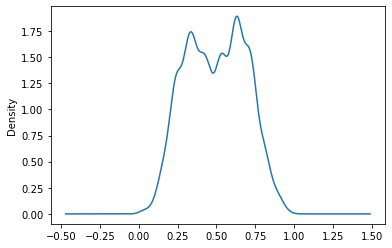

In [13]:
inp1.temp.plot.density()

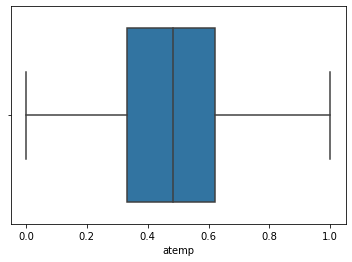

In [14]:
import matplotlib.pyplot as plt, seaborn as sns
sns.boxplot(inp1.atemp)

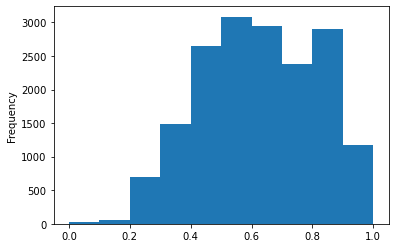

In [15]:
inp1.hum.plot.hist()

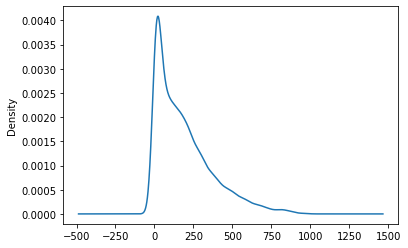

In [16]:
inp1.cnt.plot.density()

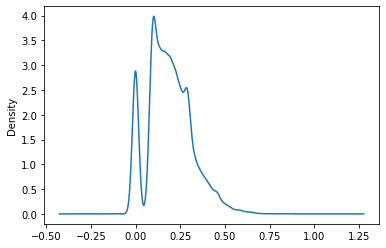

In [17]:
inp1.windspeed.plot.density()

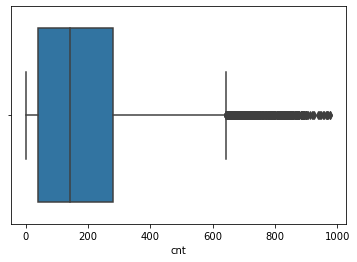

In [18]:
sns.boxplot(inp1.cnt)

In [19]:
inp1.cnt.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10      9.00
0.25     40.00
0.50    142.00
0.70    244.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

In [20]:
inp2 = inp1[inp1.cnt < 563].copy()

In [21]:
inp2.head(2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40


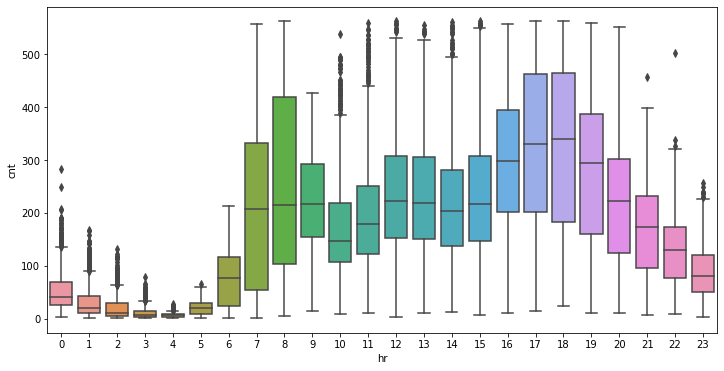

In [22]:
plt.figure(figsize=[12,6])
sns.boxplot("hr", "cnt", data=inp2)

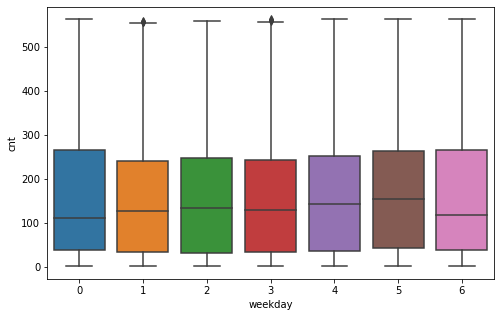

In [23]:
plt.figure(figsize=[8,5])
sns.boxplot("weekday", "cnt", data=inp2)

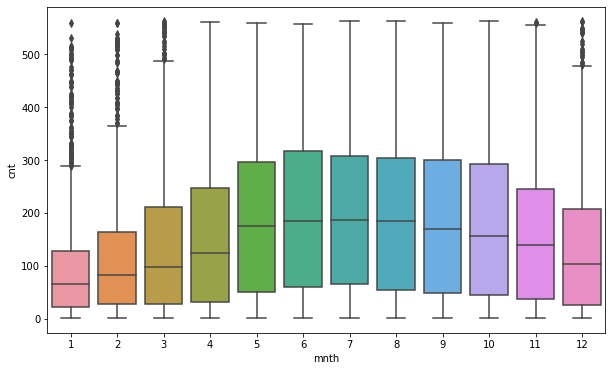

In [24]:
plt.figure(figsize=[10,6])
sns.boxplot("mnth", "cnt", data=inp2)

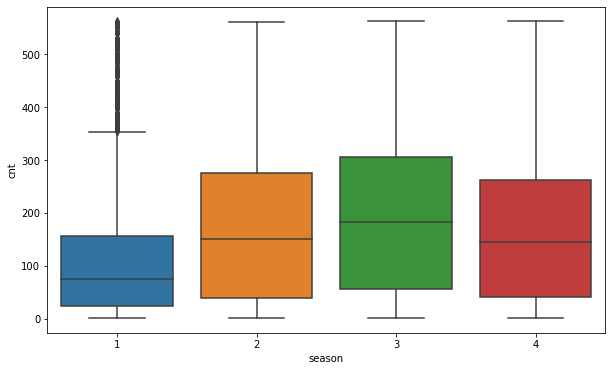

In [25]:
plt.figure(figsize=[10,6])
sns.boxplot("season", "cnt", data=inp2)

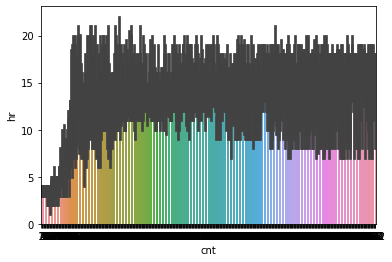

In [26]:
sns.barplot(x = 'cnt', y = 'hr',
           data = inp2, estimator= np.median)